# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

# Read csv file

In [2]:


dataset = pd.read_csv("D:\\Research Project\\Datasets\\Flood intensity\\data url\\Final Data\\Classification\\for_dimensionality_reduction1.csv", encoding= 'unicode_escape')
dataset.head()


,Unnamed: 0,ID,Area,Log_Area,Area_Affected_per_day,Log_Area_Affected_per_day,Log_Duration,Log_Dead,Log_Displaced,Day0_Temperature,...,Day.4_Condition_2,Day.4_Condition_3,Day.4_Condition_4,Day.4_Condition_5,Day.4_Condition_6,Day.4_Condition_7,Day.4_Condition_8,Day.4_Condition_9,Day.4_Condition_10,Flood_Risk
0,0,1,92615.67,11.44,23153.92,10.05,1.61,3.30,8.01,66.20,...,0,0,0,0,0,0,0,0,0,Low
1,1,2,678498.82,13.43,37694.38,10.54,2.94,5.44,11.29,68.59,...,0,0,0,0,0,0,0,0,0,High
2,2,3,12846.03,9.46,12846.03,9.46,0.69,3.78,6.10,77.79,...,0,0,0,0,0,0,0,0,0,Low
3,3,4,16542.12,9.71,1181.58,7.08,2.71,3.09,5.71,89.60,...,0,0,0,0,0,0,0,0,0,Low
4,4,5,20082.21,9.91,10041.10,9.21,1.10,3.00,0.00,53.29,...,0,0,0,0,0,0,0,0,0,Low


In [3]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

(10851, 117)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851 entries, 0 to 10850
Columns: 117 entries, Unnamed: 0 to Flood_Risk
dtypes: float64(22), int64(94), object(1)
memory usage: 9.7+ MB
None
        Unnamed: 0            ID          Area      Log_Area  \
count  10851.00000  10851.000000  1.085100e+04  10851.000000   
mean    5425.00000   2574.302368  1.864237e+05     11.309600   
std     3132.55822   1324.244927  2.603372e+05      1.622261   
min        0.00000      1.000000  1.195650e+01      2.560000   
25%     2712.50000   1443.000000  4.420653e+04     10.700000   
50%     5425.00000   2640.000000  1.217253e+05     11.708245   
75%     8137.50000   3706.000000  2.011250e+05     12.210998   
max    10850.00000   4928.000000  4.814281e+06     15.390000   

       Area_Affected_per_day  Log_Area_Affected_per_day  Log_Duration  \
count           1.085100e+04               10851.000000  10851.000000   
mean            2.823020e+04                   9.331311      2.165262   

In [4]:
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [5]:
categorical_features = ['Flood_Risk']
final_data = pd.get_dummies(dataset, columns = categorical_features)

final_data.head(2)

,Unnamed: 0,ID,Area,Log_Area,Area_Affected_per_day,Log_Area_Affected_per_day,Log_Duration,Log_Dead,Log_Displaced,Day0_Temperature,...,Day.4_Condition_4,Day.4_Condition_5,Day.4_Condition_6,Day.4_Condition_7,Day.4_Condition_8,Day.4_Condition_9,Day.4_Condition_10,Flood_Risk_High,Flood_Risk_Low,Flood_Risk_Moderate
0,0,1,92615.67,11.44,23153.92,10.05,1.61,3.30,8.01,66.20,...,0,0,0,0,0,0,0,0,1,0
1,1,2,678498.82,13.43,37694.38,10.54,2.94,5.44,11.29,68.59,...,0,0,0,0,0,0,0,1,0,0


In [6]:
final_data.dtypes

Unnamed: 0                     int64
ID                             int64
Area                         float64
Log_Area                     float64
Area_Affected_per_day        float64
Log_Area_Affected_per_day    float64
Log_Duration                 float64
Log_Dead                     float64
Log_Displaced                float64
Day0_Temperature             float64
Day.1_Temperature            float64
Day.2_Temperature            float64
Day.3_Temperature            float64
Day.4_Temperature            float64
Day0_Dew_Point                 int64
Day.1_Dew_Point                int64
Day.2_Dew_Point                int64
Day.3_Dew_Point                int64
Day.4_Dew_Point                int64
Day0_Humidity                  int64
Day.1_Humidity                 int64
Day.2_Humidity                 int64
Day.3_Humidity                 int64
Day.4_Humidity                 int64
Day0_Wind_Speed              float64
Day.1_Wind_Speed             float64
Day.2_Wind_Speed             float64
D

In [7]:
subset1 = final_data[['Flood_Risk_High','Flood_Risk_Low','Flood_Risk_Moderate','Log_Area','Log_Dead','Log_Duration']]

In [8]:
subset1.head()

,Flood_Risk_High,Flood_Risk_Low,Flood_Risk_Moderate,Log_Area,Log_Dead,Log_Duration
0,0,1,0,11.44,3.30,1.61
1,1,0,0,13.43,5.44,2.94
2,0,1,0,9.46,3.78,0.69
3,0,1,0,9.71,3.09,2.71
4,0,1,0,9.91,3.00,1.10


In [9]:
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)

In [10]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

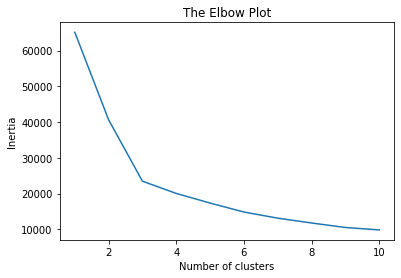

In [11]:
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X1)

KMeans(n_clusters=3)

In [13]:
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X1)

In [14]:
x_tsne.shape

(10851, 2)

In [15]:
Area_Affected = list(dataset['Log_Area'])
Dead = list(dataset['Log_Dead'])
Duration = list(dataset['Log_Duration'])
Risk = list(dataset['Flood_Risk'])

In [16]:
kmeans.labels_

array([0, 2, 0, ..., 1, 1, 1])

In [17]:
data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Area_Affected: {a}; Dead: {b}; Duration:{c}; Risk: {d} ' for a,b,c,d in list(zip(Area_Affected,Dead,Duration,Risk))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE1.html')

't-SNE1.html'